# Differential evolution

In [1]:
GLOBAL_D = 30

## Results on the `Sphere` function

Algorithm converged after 831 generations
	Mean fitness: 9.7e-05
	Best fitness: 4.3e-05
	Best chromosome: [0.000961, -0.000841, 0.000674, -0.000192, -0.000303, -0.001235, 0.000361, 0.000455, -0.00024, 0.001155, 0.002119, -0.00026, 0.001512, -0.001821, -0.001666, -0.000899, -0.000436, -0.000203, 0.001728, -0.002505, 0.001109, 0.000506, -0.001555, 0.0001, -0.000923, 0.001132, 0.001382, 0.001627, 9e-05, 0.001909]


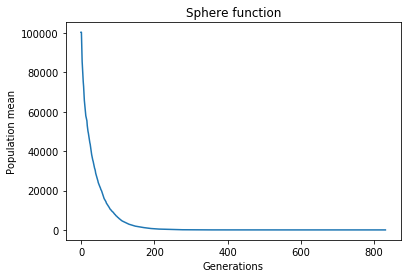

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from psets.algorithms import DE
from psets.individuals import Sphere


sphere_sim = DE(Sphere, GLOBAL_D, (-100, 100))
sphere_sim.run()
best = sorted(sphere_sim.results[-1][1], key=lambda x: x.fitness)[0]


print('Algorithm converged after {} generations'.format(sphere_sim.generations))
print('\tMean fitness:', round(sphere_sim.results[-1][0], 6))
print('\tBest fitness:', round(best.fitness, 6))
print('\tBest chromosome:', str(best))

plt.figure('Sphere mean')
SX = list(range(sphere_sim.generations + 1))
SY = [x[0] for x in sphere_sim.results]
plt.plot(SX, SY)
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Sphere function')
plt.show()

## Results on the `Ackley` function

Algorithm converged after 875 generations
	Mean fitness: 6.99e-05
	Best fitness: 4.89e-05
	Best chromosome: [-2e-06, -5e-06, -3.3e-05, 7e-06, 1.9e-05, -6e-06, -2.9e-05, -3e-06, -1.2e-05, 1.9e-05, -4e-06, 2e-06, 7e-06, -5e-06, 2e-06, 7e-06, -1.3e-05, 1.2e-05, -1.2e-05, -1.4e-05, -1.5e-05, -1e-06, -3e-06, 5e-06, 6e-06, 1e-05, -1.2e-05, 4e-06, 1.6e-05, -2e-06]


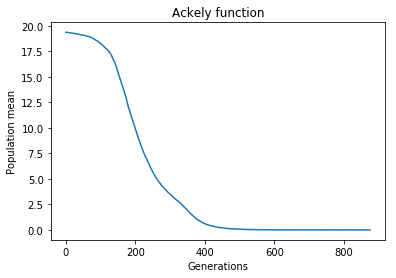

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from psets.algorithms import DE
from psets.individuals import Ackley


ackley_sim = DE(Ackley, GLOBAL_D, (-30, 30), crossover_probability=0.1)
ackley_sim.run()
best = sorted(ackley_sim.results[-1][1], key=lambda x: x.fitness)[0]


print('Algorithm converged after {} generations'.format(ackley_sim.generations))
print('\tMean fitness:', round(ackley_sim.results[-1][0], 7))
print('\tBest fitness:', round(best.fitness, 7))
print('\tBest chromosome:', str(best))

plt.figure('Sphere mean')
SX = list(range(ackley_sim.generations + 1))
SY = [x[0] for x in ackley_sim.results]
plt.plot(SX, SY)
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Ackely function')
plt.show()

## Results on the `Griewangk` function

Algorithm converged after 879 generations
	Mean fitness: 0.0001247
	Best fitness: 7.99e-05
	Best chromosome: [0.00323, -0.003862, 0.004913, 0.005967, -0.012755, -0.010025, 0.007055, 0.007402, 0.002911, -0.000589, -0.001988, -0.001944, 0.001458, -0.000245, 0.00024, 0.006364, -0.007851, -0.013518, -0.00516, 0.005921, 0.01098, 0.018182, 0.010215, 0.013459, -0.003436, 0.004992, 0.005375, 9.6e-05, -0.007038, 0.008676]


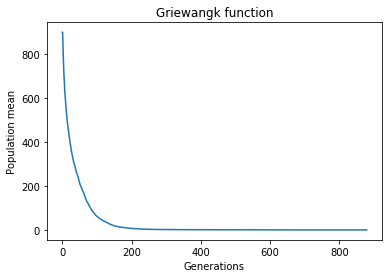

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from psets.algorithms import DE
from psets.individuals import Griewangk


griewangk_sim = DE(Griewangk, GLOBAL_D, (-600, 600))
griewangk_sim.run()
best = sorted(griewangk_sim.results[-1][1], key=lambda x: x.fitness)[0]


print('Algorithm converged after {} generations'.format(griewangk_sim.generations))
print('\tMean fitness:', round(griewangk_sim.results[-1][0], 7))
print('\tBest fitness:', round(best.fitness, 7))
print('\tBest chromosome:', str(best))

plt.figure('Sphere mean')
SX = list(range(griewangk_sim.generations + 1))
SY = [x[0] for x in griewangk_sim.results]
plt.plot(SX, SY)
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Griewangk function')
plt.show()

# GIF generaion

The code below can be called to generate a set of images to be later used to construct a `.GIF` file.

**Note:** It only work with the dimension set to $d=1$ and after the simulations above have ben ran.

Building images for Sphere...
Building images for Ackley...
Building images for Griewangk...


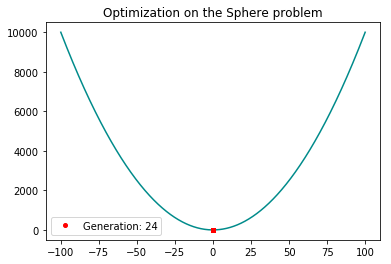

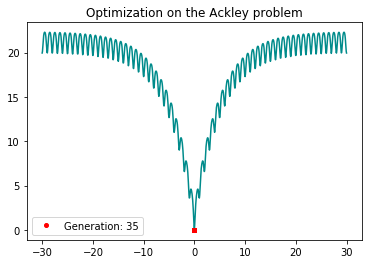

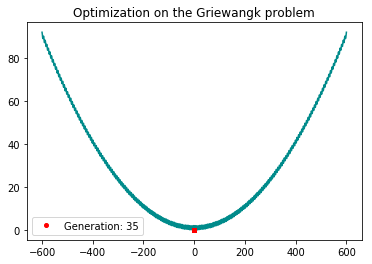

In [6]:
import numpy as np


def plot_curves(frames, PClass, p_name, output_dir, sim):
    print('Building images for {}...'.format(p_name))
    if sim.generations < frames:
        steps = list(range(sim.generations))
    else:
        steps = list(range(0, sim.generation, int(sim.generation / frames)))
        if sim.generations % mul != 0:
            steps.append(sim.generation - 1)
    fig, ax = plt.subplots()
    X = np.linspace(sim.S[0], sim.S[1], num=1000)
    Y = [PClass([x]).fitness for x in X]
    c = 0
    for i in steps:
        ax.clear()
        ax.set_title('Optimization on the {} problem'.format(p_name))
        result = sim.results[i]
        generation = result[1]
        dataX = [x.chromosome[0] for x in generation]
        dataY = [x.fitness for x in generation]
        ax.plot(X, Y, color='darkcyan')
        ax.plot(dataX, dataY, 'ro', markersize=4, label='Generation: {}'.format(i+1))
        ax.legend()
        plt.savefig('{}/{}.frame.jpg'.format(output_dir, str(c).zfill(10)))
        c += 1

plot_curves(100, Sphere, 'Sphere', 'output/sphere', sphere_sim)
plot_curves(100, Ackley, 'Ackley', 'output/ackley', ackley_sim)
plot_curves(100, Griewangk, 'Griewangk', 'output/griewangk', griewangk_sim)


## Using the `one-fifth` rule for altering the differential weight

In [3]:
from psets.algorithms import DE, CustomDE
from psets.individuals import Sphere, Ackley, Griewangk

test_suite = {
    'Sphere': {
        'problem_class': Sphere,
        'search_space': (-100, 100)
    },
    'Ackley': {
        'problem_class': Ackley,
        'search_space': (-30, 30),
        'crossover_probability': 0.1
    },
    'Griewangk': {
        'problem_class': Griewangk,
        'search_space': (-600, 600)
    },
}

D = list(range(1, 31))
benchmark = []

for d in D:
    dimension_r = []
    print('\nDimensions:', d)
    for k, v in test_suite.items():
        p_r = []
        print('\tTesting', k)
        v['dimensions'] = d
        NAMES = ['Canonic', 'Custom']
        i = 0
        print('\t\t\tGens\tMean\tBest')
        for Alg in [DE, CustomDE]:
            sim = Alg(**v)
            sim.run()
            best_fitness = round(sorted(sim.agents, key=lambda x: x.fitness)[0].fitness, 6)
            pop_fitness = round(sim.agents_fitness(sim.agents), 6)
            metrics = (sim.generations, pop_fitness, best_fitness)
            print('\t\t{}\t{}\t{}\t{}'.format(NAMES[i], *metrics))
            p_r.append(metrics)
            i += 1
        dimension_r.append(p_r)
    benchmark.append(dimension_r)


Dimensions: 1
	Testing Sphere
			Gens	Mean	Best
		Canonic	25	0.0	0.0
		Custom	25	0.0	0.0
	Testing Ackley
			Gens	Mean	Best
		Canonic	36	1e-06	0.0
		Custom	35	1e-06	0.0
	Testing Griewangk
			Gens	Mean	Best
		Canonic	38	0.0	0.0
		Custom	37	0.0	0.0

Dimensions: 2
	Testing Sphere
			Gens	Mean	Best
		Canonic	46	1e-06	0.0
		Custom	67	8e-06	0.0
	Testing Ackley
			Gens	Mean	Best
		Canonic	72	4e-06	0.0
		Custom	99	8e-06	0.0
	Testing Griewangk
			Gens	Mean	Best
		Canonic	102	1e-06	0.0
		Custom	79	2e-06	0.0

Dimensions: 3
	Testing Sphere
			Gens	Mean	Best
		Canonic	65	2e-06	0.0
		Custom	132	5e-05	0.0
	Testing Ackley
			Gens	Mean	Best
		Canonic	106	6e-06	1e-06
		Custom	194	4.9e-05	1e-06
	Testing Griewangk
			Gens	Mean	Best
		Canonic	223	2e-06	0.0
		Custom	131	0.007399	0.007396

Dimensions: 4
	Testing Sphere
			Gens	Mean	Best
		Canonic	85	4e-06	0.0
		Custom	200	0.000126	0.0
	Testing Ackley
			Gens	Mean	Best
		Canonic	137	1.3e-05	2e-06
		Custom	331	0.000148	3e-06
	Testing Griewangk
			Gens	Mean	Bes

		Canonic	823	4.6e-05	3.2e-05
		Custom	539	3.9e-05	2e-05
	Testing Ackley
			Gens	Mean	Best
		Canonic	831	7.8e-05	5.6e-05
		Custom	1226	0.000198	8e-05
	Testing Griewangk
			Gens	Mean	Best
		Canonic	845	5.7e-05	2.9e-05
		Custom	537	5e-05	3e-05

Dimensions: 30
	Testing Sphere
			Gens	Mean	Best
		Canonic	840	0.00011	6.4e-05
		Custom	587	3.9e-05	1.3e-05
	Testing Ackley
			Gens	Mean	Best
		Canonic	873	7.2e-05	5.2e-05
		Custom	1344	0.000204	0.000101
	Testing Griewangk
			Gens	Mean	Best
		Canonic	897	8.1e-05	5.2e-05
		Custom	584	7.6e-05	3.4e-05


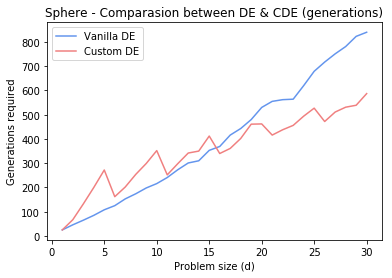

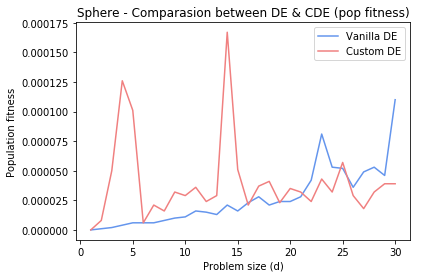

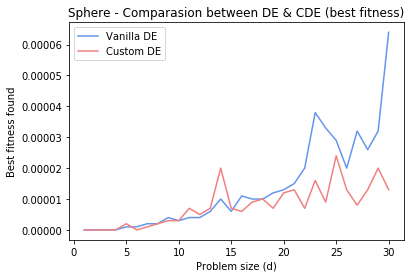

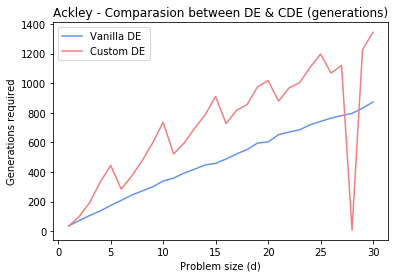

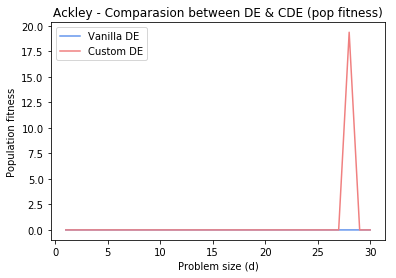

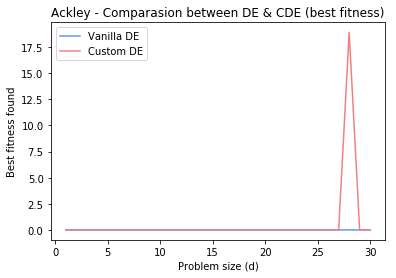

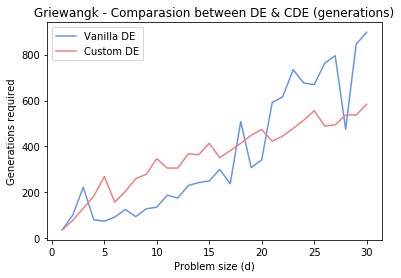

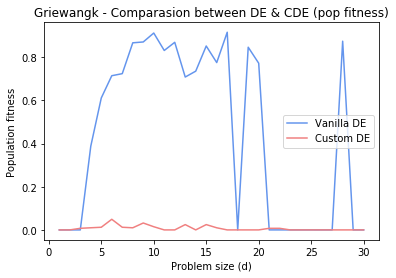

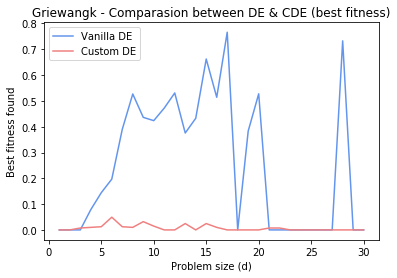

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

X = D
NAMES = ['Sphere', 'Ackley', 'Griewangk']

# index 0: problem, index 1: algorithm, index 2: metric

for i in range(3):
    problem = NAMES[i]
    # Generations
    DE_gens =[x[i][0][0] for x in benchmark]
    CDE_gens = [x[i][1][0] for x in benchmark]
    plt.figure('{} - Comparasion between DE & CDE (generations)'.format(problem))
    plt.title('{} - Comparasion between DE & CDE (generations)'.format(problem))
    plt.xlabel('Problem size (d)')
    plt.ylabel('Generations required')
    plt.plot(X, DE_gens, label='Vanilla DE', color='cornflowerblue')
    plt.plot(X, CDE_gens, label='Custom DE', color='lightcoral')
    plt.legend()
    plt.show()

    # Mean pop fitness
    DE_mean = [x[i][0][1] for x in benchmark]
    CDE_mean = [x[i][1][1] for x in benchmark]
    plt.figure('{} - Comparasion between DE & CDE (pop fitness)'.format(problem))
    plt.title('{} - Comparasion between DE & CDE (pop fitness)'.format(problem))
    plt.xlabel('Problem size (d)')
    plt.ylabel('Population fitness')
    plt.plot(X, DE_mean, label='Vanilla DE', color='cornflowerblue')
    plt.plot(X, CDE_mean, label='Custom DE', color='lightcoral')
    plt.legend()
    plt.show()
    
    # Best fitness
    DE_best = [x[i][0][2] for x in benchmark]
    CDE_best = [x[i][1][2] for x in benchmark]
    plt.figure('{} - Comparasion between DE & CDE (best fitness)'.format(problem))
    plt.title('{} - Comparasion between DE & CDE (best fitness)'.format(problem))
    plt.xlabel('Problem size (d)')
    plt.ylabel('Best fitness found')
    plt.plot(X, DE_best, label='Vanilla DE', color='cornflowerblue')
    plt.plot(X, CDE_best, label='Custom DE', color='lightcoral')
    plt.legend()
    plt.show()

In [15]:
print(benchmark[-1][2][0][2])
print(benchmark[-1][2][1][2])

5.2e-05
3.4e-05


In [22]:
M = 0
mi = 0
for i in range(30):
    diff = abs(benchmark[i][2][0][2] - benchmark[i][2][1][2])
    mi = i if diff > M else mi
    M = diff if diff > M else M
print(M, mi)
print('DE:', benchmark[mi][2][0][2])
print('CDE:', benchmark[mi][2][1][2])

0.7660629999999999 16
DE: 0.766072
CDE: 9e-06
